In [83]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, BatchNormalization

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [85]:
# https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

# Importing train and test data from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [86]:
# Reshaping the train and test data from 2D vector to 1D vector
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [87]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Min max normalization of train and test data
X_train = X_train/255
X_test = X_test/255

In [88]:
# Converting 10D vector to one-hot encoded features
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [89]:
# Layer parameters
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [90]:
# Defining a model with 2 layers and a dropout layer
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(output_dim, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_80 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_141 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_142 (Dense)            (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 421us/step - loss: 0.2993 - acc: 0.9092 - val_loss: 0.1187 - val_acc: 0.9635
Epoch 2/20
60000/60000 [==============================] - 18s 292us/step - loss: 0.1310 - acc: 0.9606 - val_loss: 0.0960 - val_acc: 0.9705
Epoch 3/20
60000/60000 [==============================] - 18s 302us/step - loss: 0.0965 - acc: 0.9701 - val_loss: 0.0787 - val_acc: 0.9756
Epoch 4/20
60000/60000 [==============================] - 19s 319us/step - loss: 0.0761 - acc: 0.9764 - val_loss: 0.0804 - val_acc: 0.9737
Epoch 5/20
60000/60000 [==============================] - 19s 314us/step - loss: 0.0676 - acc: 0.9793 - val_loss: 0.0716 - val_acc: 0.9773
Epoch 6/20
60000/60000 [==============================] - 19s 325us/step - loss: 0.0584 - acc: 0.9805 - val_loss: 0.0621 - val_acc: 0.9812
Epoch 7/20
60000/60000 [==============================] - 22s 367us/step - loss: 0.0511 - acc: 0.9830 - val_loss: 0.

Test score: 0.06313706721574504
Test accuracy: 0.9839


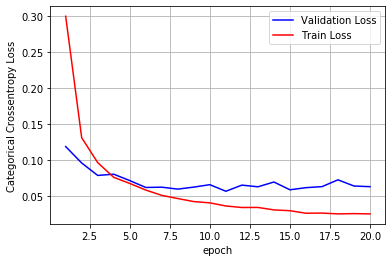

In [92]:
score = model.evaluate(X_test, Y_test, verbose=0) 

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

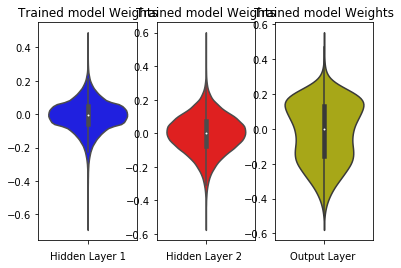

In [94]:
w_after = model.get_weights()

%matplotlib inline

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [95]:
# Defining a model with 3 layers and a dropout layer
model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(input_dim,)))
model.add(Dropout(0.4))
model.add(Dense(300, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(output_dim, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 500)               392500    
_________________________________________________________________
dropout_81 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_144 (Dense)            (None, 300)               150300    
_________________________________________________________________
batch_normalization_46 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_82 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_145 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_47 (Batc (None, 100)               400       
__________

In [96]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 42s 700us/step - loss: 0.3523 - acc: 0.8906 - val_loss: 0.1348 - val_acc: 0.9577
Epoch 2/20
60000/60000 [==============================] - 25s 411us/step - loss: 0.1620 - acc: 0.9496 - val_loss: 0.0975 - val_acc: 0.9694
Epoch 3/20
60000/60000 [==============================] - 25s 423us/step - loss: 0.1233 - acc: 0.9616 - val_loss: 0.0839 - val_acc: 0.9720
Epoch 4/20
60000/60000 [==============================] - 25s 415us/step - loss: 0.1024 - acc: 0.9679 - val_loss: 0.0690 - val_acc: 0.9769
Epoch 5/20
60000/60000 [==============================] - 27s 443us/step - loss: 0.0869 - acc: 0.9725 - val_loss: 0.0717 - val_acc: 0.9777
Epoch 6/20
  512/60000 [..............................] - ETA: 2:09 - loss: 0.0770 - acc: 0.9785

/home/mani/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.431754). Check your callbacks.
  % delta_t_median)
/home/mani/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.216622). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 21s 358us/step - loss: 0.0784 - acc: 0.9750 - val_loss: 0.0642 - val_acc: 0.9806
Epoch 7/20
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0727 - acc: 0.9769 - val_loss: 0.0636 - val_acc: 0.9808
Epoch 8/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.0653 - acc: 0.9789 - val_loss: 0.0598 - val_acc: 0.9828
Epoch 9/20
60000/60000 [==============================] - 14s 238us/step - loss: 0.0600 - acc: 0.9805 - val_loss: 0.0630 - val_acc: 0.9820
Epoch 10/20
 1024/60000 [..............................] - ETA: 1:34 - loss: 0.0568 - acc: 0.9795

/home/mani/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.238180). Check your callbacks.
  % delta_t_median)
/home/mani/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.119515). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 14s 232us/step - loss: 0.0562 - acc: 0.9822 - val_loss: 0.0577 - val_acc: 0.9829
Epoch 11/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0534 - acc: 0.9826 - val_loss: 0.0572 - val_acc: 0.9823
Epoch 12/20
60000/60000 [==============================] - 23s 388us/step - loss: 0.0505 - acc: 0.9834 - val_loss: 0.0560 - val_acc: 0.9827
Epoch 13/20
60000/60000 [==============================] - 24s 395us/step - loss: 0.0460 - acc: 0.9846 - val_loss: 0.0547 - val_acc: 0.9833
Epoch 14/20
60000/60000 [==============================] - 24s 406us/step - loss: 0.0429 - acc: 0.9858 - val_loss: 0.0516 - val_acc: 0.9845
Epoch 15/20
60000/60000 [==============================] - 25s 423us/step - loss: 0.0397 - acc: 0.9874 - val_loss: 0.0559 - val_acc: 0.9841
Epoch 16/20
60000/60000 [==============================] - 19s 310us/step - loss: 0.0395 - acc: 0.9873 - val_loss: 0.0578 - val_acc: 0.9847
Epoch 17/20
60000/60000 [=======

Test score: 0.05719636394771806
Test accuracy: 0.9843


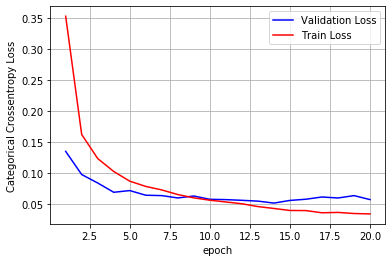

In [97]:
score = model.evaluate(X_test, Y_test, verbose=0) 

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

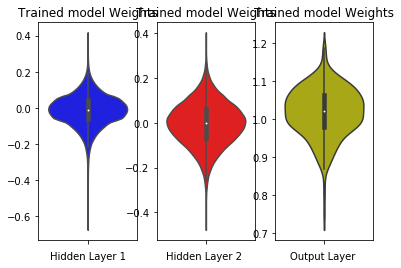

In [98]:
w_after = model.get_weights()

%matplotlib inline

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [99]:
# Defining a model with 5 layers and a dropout layer
model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(input_dim,)))
model.add(Dropout(0.3))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(output_dim, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 500)               392500    
_________________________________________________________________
dropout_83 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_148 (Dense)            (None, 400)               200400    
_________________________________________________________________
dropout_84 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_149 (Dense)            (None, 300)               120300    
_________________________________________________________________
dropout_85 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_150 (Dense)            (None, 200)               60200     
__________

In [100]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 43s 725us/step - loss: 0.4519 - acc: 0.8622 - val_loss: 0.1332 - val_acc: 0.9621
Epoch 2/20
60000/60000 [==============================] - 33s 542us/step - loss: 0.1658 - acc: 0.9516 - val_loss: 0.1103 - val_acc: 0.9692
Epoch 3/20
60000/60000 [==============================] - 33s 558us/step - loss: 0.1244 - acc: 0.9624 - val_loss: 0.0918 - val_acc: 0.9739
Epoch 4/20
60000/60000 [==============================] - 34s 569us/step - loss: 0.1060 - acc: 0.9686 - val_loss: 0.0808 - val_acc: 0.9774
Epoch 5/20
60000/60000 [==============================] - 36s 599us/step - loss: 0.0885 - acc: 0.9735 - val_loss: 0.0795 - val_acc: 0.9769
Epoch 6/20
60000/60000 [==============================] - 33s 557us/step - loss: 0.0787 - acc: 0.9768 - val_loss: 0.0880 - val_acc: 0.9751
Epoch 7/20
60000/60000 [==============================] - 36s 608us/step - loss: 0.0722 - acc: 0.9785 - val_loss: 0.

Test score: 0.06216628487450071
Test accuracy: 0.9837


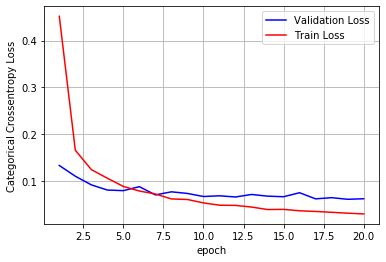

In [101]:
score = model.evaluate(X_test, Y_test, verbose=0) 

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']

plt_dynamic(x, vy, ty, ax)

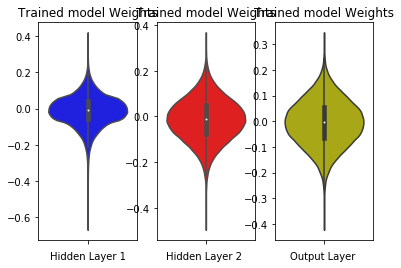

In [102]:
w_after = model.get_weights()

%matplotlib inline

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Observations

1. The train and validation loss has a very steep difference when only two layers are trained with only Dropout layer.
2. When models trained with multiple Dropout layers and BatchNormalization with 3 and 5 layers the train and validation loss are very close.
3. Weight distributions are smooth guassian curves in the violin plot for 3 and 5 layered networks.